Data set from COVID pandemic taken from kaggle: https://www.kaggle.com/datasets/ghost5612/novel-covid-19-dataset/data

Sno – Serial number of the record
ObservationDate – Date of the observation (MM/DD/YYYY)
Province/State – Province or state of the observation (may be missing for some entries)
Country/Region – Country of the observation
Last Update – Timestamp (UTC) when the record was last updated (not standardized, requires cleaning before use)
Confirmed – Cumulative number of confirmed cases on that date
Deaths – Cumulative number of deaths on that date
Recovered – Cumulative number of recoveries on that date

There are multiple workbooks so we will make multiple DataFrames

In [147]:
import pandas as pd

'''
Abbreviations
ts - time series
us - United States
'''

ts_confirmed_us = pd.read_csv(r"C:\Users\tombo\OneDrive\Documents\Python Projects\Data\time_series_covid_19_confirmed_US.csv")
ts_confirmed = pd.read_csv(r"C:\Users\tombo\OneDrive\Documents\Python Projects\Data\time_series_covid_19_confirmed.csv")
ts_deaths_us = pd.read_csv(r"C:\Users\tombo\OneDrive\Documents\Python Projects\Data\time_series_covid_19_deaths_US.csv")
ts_deaths = pd.read_csv(r"C:\Users\tombo\OneDrive\Documents\Python Projects\Data\time_series_covid_19_deaths.csv")
ts_recovered = pd.read_csv(r"C:\Users\tombo\OneDrive\Documents\Python Projects\Data\time_series_covid_19_recovered.csv")



Now to explore our DataFrames to understand their columns and records.

In [148]:
ts_confirmed_us.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,7049,7106,7113,7118,7118,7126,7135,7141,7142,7142
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,21489,21511,21535,21546,21554,21578,21593,21606,21620,21620
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2326,2327,2328,2328,2328,2331,2331,2333,2334,2334
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2656,2657,2656,2658,2659,2660,2662,2666,2664,2664
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6816,6826,6829,6832,6832,6847,6856,6862,6864,6864
5,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
6,84001013,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,...,2195,2199,2201,2202,2202,2210,2216,2215,2219,2219
7,84001015,US,USA,840,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,...,14590,14588,14595,14606,14608,14606,14614,14621,14622,14622
8,84001017,US,USA,840,1017.0,Chambers,Alabama,US,32.913601,-85.390727,...,3622,3634,3636,3640,3641,3653,3654,3662,3665,3665
9,84001019,US,USA,840,1019.0,Cherokee,Alabama,US,34.178060,-85.606390,...,1852,1852,1854,1858,1858,1859,1859,1861,1862,1862


Each record has a unique ID. All the records are based in the US, now we could group the records by province to compare provinces against each other.

In [149]:
ts_us_byprovince = ts_confirmed_us.groupby(by="Province_State").mean(numeric_only=True)
ts_us_byprovince

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,8.400350e+07,840.0,3499.869565,31.931113,-84.196785,0.00000,0.00000,0.000000,0.000000,0.000000,...,7843.913043,7850.333333,7854.028986,7856.869565,7858.782609,7863.217391,7867.115942,7872.130435,7875.434783,7875.434783
Alaska,8.400717e+07,840.0,7165.848485,56.628273,-139.571540,0.00000,0.00000,0.000000,0.000000,0.000000,...,2116.212121,2118.242424,2118.242424,2118.242424,2121.181818,2122.787879,2124.818182,2126.121212,2127.515152,2127.515152
American Samoa,1.600000e+01,16.0,60.000000,-14.271000,-170.132000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arizona,8.401354e+07,840.0,13542.117647,29.714033,-98.349911,0.00000,0.00000,0.000000,0.000000,0.058824,...,51482.058824,51515.647059,51553.588235,51572.470588,51598.941176,51628.352941,51666.941176,51711.882353,51759.352941,51792.117647
Arkansas,8.400715e+07,840.0,7151.103896,34.005087,-90.033096,0.00000,0.00000,0.000000,0.000000,0.000000,...,4411.194805,4413.805195,4416.103896,4417.363636,4418.000000,4422.272727,4424.649351,4427.480519,4430.259740,4432.337662
California,8.400869e+07,840.0,8689.600000,36.582496,-116.704308,0.00000,0.00000,0.000000,0.000000,0.033333,...,62908.233333,62926.983333,62939.100000,62951.283333,62975.916667,62999.966667,63018.666667,63107.650000,63131.850000,63145.216667
Colorado,8.401039e+07,840.0,10393.924242,37.755612,-102.289687,0.00000,0.00000,0.000000,0.000000,0.000000,...,8110.848485,8123.151515,8135.893939,8142.439394,8149.363636,8170.621212,8183.212121,8195.818182,8207.969697,8218.257576
Connecticut,8.402421e+07,840.0,24208.200000,33.290944,-58.125464,0.00000,0.00000,0.000000,0.000000,0.000000,...,34615.400000,34632.500000,34632.500000,34632.500000,34671.100000,34689.200000,34698.000000,34713.700000,34734.100000,34734.100000
Delaware,8.404001e+07,840.0,40005.800000,23.465566,-45.319942,0.00000,0.00000,0.000000,0.000000,0.000000,...,21606.200000,21633.200000,21656.000000,21673.000000,21681.800000,21681.800000,21706.400000,21721.400000,21736.200000,21754.000000


Get column values

In [150]:
ts_us_byprovince.columns.values

array(['UID', 'code3', 'FIPS', 'Lat', 'Long_', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20',
       '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20',
       '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20',
       '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20',
       '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20',
       '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20',
       '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20',
       '4

The data is cumulative so we can get an idea of the last known count by using the last date which is 5/29/21. Now we will find the province with the most cases.
First to select the series.

In [151]:
final_date = ts_us_byprovince['5/29/21']
final_date.values

array([7.87543478e+03, 2.12751515e+03, 0.00000000e+00, 5.17921176e+04,
       4.43233766e+03, 6.31452167e+04, 8.21825758e+03, 3.47341000e+04,
       2.17540000e+04, 4.90000000e+01, 1.62993333e+04, 3.36350435e+04,
       6.97728571e+03, 1.03000000e+02, 8.15600000e+03, 5.16057143e+03,
       4.17417391e+03, 1.32786346e+04, 7.90785106e+03, 3.67654455e+03,
       2.94701869e+03, 3.75635246e+03, 7.13159091e+03, 3.75877778e+03,
       1.76741538e+04, 4.15754706e+04, 1.14016207e+04, 6.75398876e+03,
       3.77865476e+03, 5.13622881e+03, 1.92732759e+03, 2.35056842e+03,
       1.70393684e+04, 8.22491667e+03, 4.41690870e+04, 5.79488571e+03,
       3.28289844e+04, 9.81523529e+03, 1.99845455e+03, 1.83000000e+02,
       1.22395222e+04, 5.73135443e+03, 5.28960526e+03, 1.74335072e+04,
       1.73223750e+03, 2.16775714e+04, 1.23523333e+04, 1.82591176e+03,
       8.89073196e+03, 1.15346133e+04, 1.09689459e+04, 1.51250000e+03,
       3.44200000e+03, 5.00122222e+03, 1.06304634e+04, 2.82959649e+03,
      

Now to get the index of the highest number in this series and use that index to reference the province series.

In [152]:
idx = final_date.idxmax()
max_province = ts_us_byprovince.loc[idx]
max_province

UID        8.400869e+07
code3      8.400000e+02
FIPS       8.689600e+03
Lat        3.658250e+01
Long_     -1.167043e+02
               ...     
5/25/21    6.299997e+04
5/26/21    6.301867e+04
5/27/21    6.310765e+04
5/28/21    6.313185e+04
5/29/21    6.314522e+04
Name: California, Length: 499, dtype: float64

California had the most cases by 29th May 2021 with a sum of 63,145 cases. (6.3145*10^4)

Since the data shows us a change over time, we want to visualise this to make it easier to interpret. As such, we will use matplotlib.pyplot to create a line graph.

We can't simply plot all of the data because there are too many provinces so they would never fit on a line graph. So we will sort them by number of cases in ascending order and only plot the first 10

In [153]:
final_col = ts_us_byprovince.columns[-1]
ts_us_byprovince.sort_values(by=final_col, ascending=True)
top_ten = ts_us_byprovince.head(10)
top_ten

top_ten = top_ten.iloc[:, 6:]
top_ten

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7843.913043,7850.333333,7854.028986,7856.869565,7858.782609,7863.217391,7867.115942,7872.130435,7875.434783,7875.434783
Alaska,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2116.212121,2118.242424,2118.242424,2118.242424,2121.181818,2122.787879,2124.818182,2126.121212,2127.515152,2127.515152
American Samoa,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arizona,0.0,0.0,0.0,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,51482.058824,51515.647059,51553.588235,51572.470588,51598.941176,51628.352941,51666.941176,51711.882353,51759.352941,51792.117647
Arkansas,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4411.194805,4413.805195,4416.103896,4417.363636,4418.000000,4422.272727,4424.649351,4427.480519,4430.259740,4432.337662
California,0.0,0.0,0.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.050000,0.050000,...,62908.233333,62926.983333,62939.100000,62951.283333,62975.916667,62999.966667,63018.666667,63107.650000,63131.850000,63145.216667
Colorado,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8110.848485,8123.151515,8135.893939,8142.439394,8149.363636,8170.621212,8183.212121,8195.818182,8207.969697,8218.257576
Connecticut,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,34615.400000,34632.500000,34632.500000,34632.500000,34671.100000,34689.200000,34698.000000,34713.700000,34734.100000,34734.100000
Delaware,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21606.200000,21633.200000,21656.000000,21673.000000,21681.800000,21681.800000,21706.400000,21721.400000,21736.200000,21754.000000


<Axes: >

<Figure size 640x480 with 0 Axes>

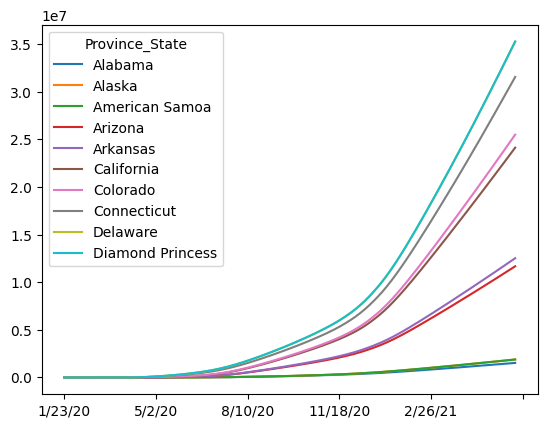

In [158]:
import matplotlib.pyplot as plt

# Matplotlib expects dates in the index in order to plot them on the x axis. 
# Therefore we need to transpose it.
top_ten = top_ten.T
top_ten = top_ten.cumsum()

plt.figure()

top_ten.plot()
